In [68]:
import os
import sys
from typing import Dict, List
import numpy as np
import pandas as pd
from copy import deepcopy
import mdtraj as md
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader as PyGDataLoader

from torchvision.io import read_image

class CNN_Dataset(Dataset):
    def __init__(self, sys_data_dir: str, mem_data_dir: str, transform = None):
        super(CNN_Dataset, self).__init__()
        self.sys_data_dir = sys_data_dir
        self.mem_data_dir = mem_data_dir ### In images (png) format
        self.transform = transform

        self.imgs_dir, labels = [], []
        sys_data = pd.read_csv(self.sys_data_dir)
        water_counts = torch.tensor(sys_data["water_counts"].values) 
        sys_file_names = sys_data["sys_filename"].values
        mem_img_list = os.listdir(mem_data_dir)

        for x in range(len(sys_file_names)):
            sys_file_name = sys_file_names[x]
            for y in mem_img_list:
                if sys_file_name == y[:-4]:
                    img_dir = mem_data_dir+y
                    self.imgs_dir.append(img_dir)
                    labels.append(water_counts[x])

        self.labels = np.array(labels, dtype = np.float32)
        self.len = len(self.labels)

    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        img = Image.open(self.imgs_dir[index])
        img = img.convert("RGB")
        img = self.transform(img)
        img = np.array(img) / 255.0
        img = np.moveaxis(img, 2, 0)
        img = torch.from_numpy(img).type(torch.FloatTensor)
        label = self.labels[index]
        return img , label
    



transform = transforms.Compose([
    transforms.CenterCrop((380, 380)),
    transforms.Resize((224, 224)),
])
CNN_Data = CNN_Dataset(
    sys_data_dir='/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv', 
    mem_data_dir='/home/cmu/Desktop/Summer_research/memb_img/', 
    transform= transform
)

train_size = int(0.8 * len(CNN_Data))
test_size = len(CNN_Data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(CNN_Data, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
e = 0
print(len(train_dataloader))
for i, (img, label) in enumerate(train_dataloader):
    e+=1
print(e)


1360


KeyboardInterrupt: 

In [65]:
train = DataLoader(CNN, batch_size=64, shuffle= True)
train_data, train_label = next(iter(train))
img = train_data[0]

print((train_data[0].shape))

torch.Size([3, 224, 224])


In [19]:
from data_cnn import CNNDataset
sys_dir = "/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv" 
mem_dir = "/home/cmu/Desktop/Summer_research/memb_img/"
CNN1 = CNNDataset(sys_dir, mem_dir)
train = DataLoader(CNN1, batch_size=64, shuffle= True)
train_data, train_label = next(iter(train))
img = train_data[0]

print(train_data[0].shape, train_label[0])


torch.Size([4, 500, 500]) tensor(1., dtype=torch.float64)


(224, 224)


AttributeError: ndim

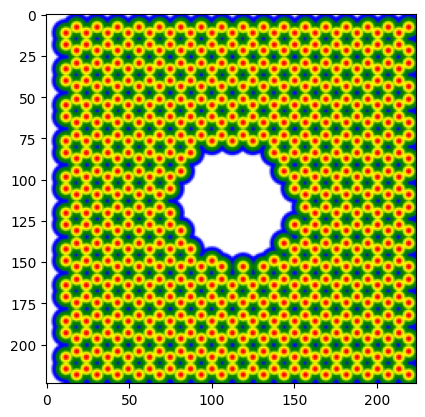

In [37]:
img = Image.open("../../memb_img/circular_49.png")
img = img.convert("RGB")
plt.imshow(img)
from torchvision import transforms

transform = transforms.Compose([
    transforms.CenterCrop((380, 380)),
    transforms.Resize((224, 224))
])
img = transform(img)
print(img.size)
plt.imshow(img)

img = np.rollaxis(img, 2, 0) / 255.0
print(img.shape)
img = torch.from_numpy(img).type(torch.FloatTensor)


In [6]:
import torchvision
ct = 0
resnet = torchvision.models.resnet18(pretrained=True)
for child in resnet.children():
    print("resnet child",child)
    ct += 1
    if ct < 7:
        print("sjdiajsd")

resnet child Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
sjdiajsd
resnet child BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
sjdiajsd
resnet child ReLU(inplace=True)
sjdiajsd
resnet child MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
sjdiajsd
resnet child Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(

In [9]:
import torch
mu = -0.3485
std = 1.2201
m = torch.distributions.Normal(mu, std)
loss = -m.log_prob(torch.Tensor([1]))
loss


tensor([1.7286])

In [100]:
import pandas as pd
sys_data = pd.read_csv("/home/cmu/Desktop/Summer_research/sys_data.csv")
print(sys_data.head())
positions = sys_data["atom_positions"].values
atoms_from_df = sys_data["atoms"].values 
water_counts = sys_data["water_counts"].values
sys_file_names = sys_data["sys_filename"].values
names = []
atom_positions = []
atoms = [] 
counts = []
displacement = []
count = 0 
for x in range(len(sys_file_names)):
    if sys_file_names[x][:12] == "circular_22_":
        names.append(sys_file_names[x][12:])
        atom_positions.append(positions[x])
        atoms.append(atoms_from_df[x])
        counts.append(water_counts[x])
        # if x > 0:
        #     displacement.append(positions[x]-positions[x-1])
        # else:
        #     displacement.append(0)
# df = pd.DataFrame({"names": names, "atom_pos": atom_positions, "atoms": atoms, "water_counts": counts, "displacement": displacement})
df = pd.DataFrame({"names": names, "atom_pos": atom_positions, "atoms": atoms, "water_counts": counts})
# df[df["water_counts"] == 2].to_csv("/home/cmu/Desktop/Summer_research/position_data_2.csv", index = False, header= True)
df[df["water_counts"] == 2]

      sys_filename      shape  \
0  circular_8_1439  (1, 6, 3)   
1  circular_27_571  (1, 3, 3)   
2   circular_22_84  (1, 9, 3)   
3  circular_48_375  (1, 6, 3)   
4  circular_15_107  (1, 6, 3)   

                                      atom_positions  \
0  [1.9837 2.1313 9.6744 2.0069 2.2093 9.7326 1.8...   
1  [2.0112 1.9866 9.4599 1.9346 1.9497 9.5125 2.0...   
2  [2.0191 2.0211 9.5876 1.9474 2.0583 9.6466 2.0...   
3  [2.0187 2.1102 9.6702 2.0223 2.1193 9.5707 2.0...   
4  [2.0403 2.0235 9.5979 2.0483 2.0328 9.4987 1.9...   

                                           atoms  water_counts  
0                 ['O', 'H', 'H', 'O', 'H', 'H']           2.0  
1                                ['O', 'H', 'H']           1.0  
2  ['O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H']           3.0  
3                 ['O', 'H', 'H', 'O', 'H', 'H']           2.0  
4                 ['O', 'H', 'H', 'O', 'H', 'H']           2.0  


,names,atom_pos,atoms,water_counts
1,41,[2.0168 1.9832 9.5555 1.9214 1.965 9.5793 2.0...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
3,466,[1.9865 1.9221 9.5913 2.01 2.0115 9.6293 2.0...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
5,1197,[1.9932 2.0689 9.6303 2.0506 2.1253 9.6896 1.9...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
7,1339,[2.0153 1.9316 9.6342 2.0222 1.9018 9.539 2.0...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
8,240,[2.0118 2.0598 9.6128 1.9549 1.9874 9.6518 2.1...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
...,...,...,...,...
1969,934,[2.0428 2.0704 9.6328 2.0326 2.0627 9.5337 2.1...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
1971,540,[1.9313 1.9938 9.6767 2.0075 1.9574 9.7303 1.9...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
1972,1323,[2.0694 1.957 9.4562 2.0466 1.8732 9.4066 2.1...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0
1974,388,[2.025 1.948 9.6268 1.9253 1.9477 9.6348 2.0...,"['O', 'H', 'H', 'O', 'H', 'H']",2.0


In [33]:
import os
import sys
from typing import Dict, List
import numpy as np
import pandas as pd
from copy import deepcopy
import mdtraj as md
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader as PyGDataLoader

from torchvision.io import read_image
# pos_data = pd.read_csv("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv")

data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv"

class Diffusion_Dataset(Dataset):
    def __init__(self, data_dir: str, sys_dir = None):
        super(Diffusion_Dataset, self).__init__()
        self.data_dir = data_dir
        sys_data = pd.read_csv("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv")
        sys_file_names = sys_data["sys_filename"]
        positions, labels = [], []
        pos_2_data = pd.read_csv(self.data_dir)
        name = "circular_22"
        timestamps = pos_2_data["names"].values

        for x in timestamps:
            file_name = name+x
            for y in range(len(sys_file_names)):
                if file_name == sys_file_names[y]:
                    traj = md.load_pdb(sys_dir+file_name+".pdb")
                    pos = traj.xyz[0].flatten()
                    positions.append(pos)
                else:
                    print("something wrong")


                    

        self.labels = np.array(labels, dtype = np.float32)
        self.len = len(self.labels)

    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        img = Image.open(self.imgs_dir[index])
        img = img.convert("RGB")
        img = self.transform(img)
        img = np.array(img) / 255.0
        img = np.moveaxis(img, 2, 0)
        img = torch.from_numpy(img).type(torch.FloatTensor)
        label = self.labels[index]
        return img , label
    



transform = transforms.Compose([
    transforms.CenterCrop((380, 380)),
    transforms.Resize((224, 224)),
])
CNN_Data = CNN_Dataset(
    sys_data_dir='/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv', 
    mem_data_dir='/home/cmu/Desktop/Summer_research/memb_img/', 
    transform= transform
)

train_size = int(0.8 * len(CNN_Data))
test_size = len(CNN_Data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(CNN_Data, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
e = 0
print(len(train_dataloader))
for i, (img, label) in enumerate(train_dataloader):
    e+=1
print(e)


[[2.0168 1.9832 9.5555]
 [1.9214 1.965  9.5793]
 [2.0761 1.9528 9.63  ]
 [2.038  2.0579 9.3072]
 [1.9427 2.0443 9.2804]
 [2.0498 2.032  9.4031]]
[[2.0521 1.9611 9.4143]
 [2.0814 1.8836 9.4703]
 [1.9723 1.9348 9.36  ]]


In [101]:
from tqdm import tqdm
data_dir = "/home/cmu/Desktop/Summer_research/position_data_2.csv"
sys_dir = "/home/cmu/Desktop/Summer_research/sys_pdb/"
sys_data = pd.read_csv("/home/cmu/Desktop/Summer_research/ScoreMD_EGNN/sys_data.csv")
sys_file_names = sys_data["sys_filename"]
positions, labels = [], []
pos_2_data = pd.read_csv(data_dir)
name = "circular_22"
timestamps = pos_2_data["names"].values

for x in timestamps:
    print(x)
    file_name = name+str(x)
    traj = md.load_pdb(sys_dir+file_name+".pdb")
    pos = traj.xyz[0].flatten()
    positions.append(pos)

positions

nan


FileNotFoundError: [Errno 2] No such file or directory: '/home/cmu/Desktop/Summer_research/sys_pdb/circular_22nan.pdb'

In [78]:
import pandas as pd
import numpy as np
sys_data = pd.read_csv("/home/cmu/Desktop/Summer_research/sys_data.csv")
atom_pos = sys_data["atom_positions"].apply(eval)
atom_pos_1 = atom_pos[4]
atom_pos_2 = atom_pos[0]
print(type(atom_pos_1[0]))
print(atom_pos_1[1])
x = atom_pos_2-atom_pos_1
x

SyntaxError: invalid syntax (<string>, line 1)

In [48]:
import mdtraj as md

traj = md.load_pdb('../.././sys_pdb/sys_pdb/circular_22_1972.pdb')
print(traj)
top = traj.topology
print(top)
print(traj.xyz.shape)
pos = np.array(traj.xyz[0])
print(pos)


FileNotFoundError: [Errno 2] No such file or directory: '../.././sys_pdb/sys_pdb/circular_22_1972.pdb'